# Pandas로 시계열 데이터 다루기

시계열 자료는 인덱스가 날짜 혹은 시간인 데이터를 말한다. Pandas에서 시계열 자료를 생성하려면 인덱스를 DatetimeIndex 자료형으로 만들어야 한다. DatetimeIndex는 특정한 순간에 기록된 타임스탬프(timestamp) 형식의 시계열 자료를 다루기 위한 인덱스이다. 타임스탬프 인덱스의 라벨값이 반드시 일정한 간격일 필요는 없다.

DatetimeIndex 인덱스는 다음과 같은 보조 함수를 사용하여 생성한다.

* pd.to_datetime 함수 
    > pd.to_datetime 함수를 쓰면 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 DatetimeIndex 자료형 인덱스를 생성한다.

* pd.date_range 함수 
    > pd.date_range 함수를 쓰면 모든 날짜/시간을 일일히 입력할 필요없이 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 준다.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

pd.to_datetime 함수를 사용하여 DatetimeIndex를 생성한다.

In [2]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

이렇게 만들어진 인덱스를 사용하여 시리즈나 데이터프레임을 생성하면 된다.

In [ ]:
np.random.seed(0)
s = pd.Series(np.random.randn(4), index=idx)
s

pd.date_range 함수를 쓰면 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 준다.

In [3]:
pd.date_range("2018-4-1", "2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [4]:
pd.date_range(start="2018-4-1", periods=30)

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

많이 사용되는 `freq 인수값`은 다음과 같다.

* s: 초
* T: 분
* H: 시간
* D: 일(day)
* B: 주말이 아닌 평일
* W: 주(일요일)
* W-MON: 주(월요일)
* M: 각 달(month)의 마지막 날
* MS: 각 달의 첫날
* BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
* BMS: 주말이 아닌 평일 중에서 각 달의 첫날
* WOM-2THU: 각 달의 두번째 목요일
* Q-JAN: 각 분기의 첫달의 마지막 날
* Q-DEC: 각 분기의 마지막 달의 마지막 날

In [6]:
pd.date_range("2019-10-1", "2019-10-31", freq="W-MON")

DatetimeIndex(['2019-10-07', '2019-10-14', '2019-10-21', '2019-10-28'], dtype='datetime64[ns]', freq='W-MON')

In [7]:
pd.date_range("2019-1-1", "2019-12-31", freq="M")

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')

# Shift 연산
시계열 데이터의 인덱스는 시간이나 날짜를 나타내기 때문에 날짜 이동 등의 다양한 연산이 가능하다.

In [8]:
np.random.seed(0)
ts = pd.Series(np.random.randn(4), index=pd.date_range(
    "2019-10-1", periods=4, freq="M"))
ts

2019-10-31    1.764052
2019-11-30    0.400157
2019-12-31    0.978738
2020-01-31    2.240893
Freq: M, dtype: float64

In [9]:
ts.shift(1)

2019-10-31         NaN
2019-11-30    1.764052
2019-12-31    0.400157
2020-01-31    0.978738
Freq: M, dtype: float64

In [10]:
ts.shift(1, freq="W")

2019-11-03    1.764052
2019-12-01    0.400157
2020-01-05    0.978738
2020-02-02    2.240893
Freq: WOM-1SUN, dtype: float64

# resample 연산
resample 연산을 쓰면 시간 간격을 재조정하는 리샘플링(resampling)이 가능하다.   
오른쪽 한계값(가장 늦은 값)은 포함하지 않는다.

In [28]:
ts = pd.Series(np.random.randn(100), index=pd.date_range(
    "2019-1-1", periods=100, freq="D"))
ts.head(10)

2019-01-01   -1.768538
2019-01-02    0.355482
2019-01-03    0.814520
2019-01-04    0.058926
2019-01-05   -0.185054
2019-01-06   -0.807648
2019-01-07   -1.446535
2019-01-08    0.800298
2019-01-09   -0.309114
2019-01-10   -0.233467
Freq: D, dtype: float64

In [29]:
ts.resample('W').mean()

2019-01-06   -0.255386
2019-01-13    0.228461
2019-01-20    0.417499
2019-01-27   -0.371291
2019-02-03   -0.014354
2019-02-10    0.044053
2019-02-17   -0.249958
2019-02-24    0.090167
2019-03-03    0.014976
2019-03-10   -0.946041
2019-03-17    0.583550
2019-03-24    0.026867
2019-03-31    0.249480
2019-04-07    0.105193
2019-04-14    0.275963
Freq: W-SUN, dtype: float64

In [15]:
ts.resample('M').first()

2019-01-31    0.640132
2019-02-28    0.781198
2019-03-31   -0.052567
2019-04-30   -0.135950
Freq: M, dtype: float64

ohlc 메서드는 구간의 시고저종(open, high, low, close)값을 구한다.

In [16]:
ts.resample('5T').ohlc()

,open,high,low,close
2019-01-01 00:00:00,0.640132,0.640132,0.640132,0.640132
2019-01-01 00:05:00,NaN,NaN,NaN,NaN
2019-01-01 00:10:00,NaN,NaN,NaN,NaN
2019-01-01 00:15:00,NaN,NaN,NaN,NaN
2019-01-01 00:20:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2019-04-09 23:40:00,NaN,NaN,NaN,NaN
2019-04-09 23:45:00,NaN,NaN,NaN,NaN
2019-04-09 23:50:00,NaN,NaN,NaN,NaN
2019-04-09 23:55:00,NaN,NaN,NaN,NaN


## 시계열 데이터 분석

월마트 주식 데이터를 읽어들여 시계열 데이터 분석 방법을 익혀보자.

In [3]:
df = pd.read_csv('../data/walmart_stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
1,2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2,2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
3,2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
4,2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null object
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [23]:
# Date 컬럼을 datatime으로 변환한다.
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
Date         1258 non-null datetime64[ns]
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


 date column을 index로 만들어 준다.

In [25]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


위에서 했던 것을 조금 더 쉽게 처리하기 위해 다음과 같은 방법을 사용할 수 있다.  
년월일 형식과 같은 경우 그냥 parse_dates라고 하면 data type을 변환한다.

In [6]:
df = pd.read_csv('../data/walmart_stock.csv', index_col='Date', parse_dates=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
Open         1258 non-null float64
High         1258 non-null float64
Low          1258 non-null float64
Close        1258 non-null float64
Volume       1258 non-null int64
Adj Close    1258 non-null float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [31]:
# 매년간의 모든 데이터 값의 평균
df.resample('A').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,67.158680,67.602120,66.786520,67.215120,9.239015e+06,59.389349
2013-12-31,75.264048,75.729405,74.843055,75.320516,6.951496e+06,68.147179
2014-12-31,77.274524,77.740040,76.864405,77.327381,6.515612e+06,71.709712
2015-12-31,72.569405,73.064167,72.034802,72.491111,9.040769e+06,68.831426
2016-12-31,69.481349,70.019643,69.023492,69.547063,9.371645e+06,68.054229


In [32]:
# 분기별 평균
df.resample('Q').mean()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-03-31,60.462903,60.807258,60.160484,60.519516,8.850221e+06,52.881839
2012-06-30,62.888889,63.400159,62.592222,63.057143,1.155795e+07,55.594392
2012-09-30,73.081587,73.549682,72.717619,73.174921,7.871587e+06,64.891949
2012-12-31,72.174678,72.623226,71.647741,72.079839,8.660958e+06,64.161672
2013-03-31,70.898834,71.393000,70.552666,71.026000,8.482003e+06,63.581880
2013-06-30,76.873906,77.417813,76.413281,76.885781,7.656086e+06,69.393600
2013-09-30,75.637969,76.030469,75.213594,75.629063,5.796625e+06,68.676662
2013-12-31,77.372656,77.805313,76.924531,77.472813,5.966927e+06,70.651242
2014-03-31,75.339344,75.802787,74.863278,75.337213,7.050402e+06,69.106983


mean이나 max이외에 resample할 때 내가 원하는 함수를 등록하여 적용할 수도 있다.


In [34]:
def diff(X):
    return max(X) - min(X)

In [36]:
df.resample('A').apply(diff)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-12-31,20.009998,19.169998,19.510002,19.790001,35102500,18.204682
2013-12-31,13.019997,12.700005,13.099999,12.909996,23588800,12.890232
2014-12-31,14.810005,14.989998,14.210006,14.879997,20320600,15.176287
2015-12-31,34.410004,33.910000,32.950001,34.050003,78415300,30.938635
2016-12-31,14.000000,13.700000,13.429996,13.460003,30842300,14.541917


# 시계열 데이터 시각화
시계열 데이터는 선그래프로 시각화 할 수 있다.

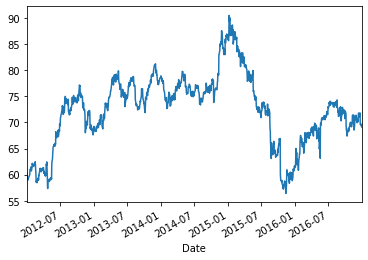

In [7]:
# 월마트 주식 종가를 시각화
df['Close'].plot()
plt.show()

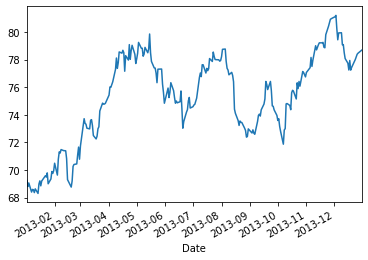

In [9]:
# 2013년도의 종가 정보만을 시각화
df['Close'].loc['2013'].plot()

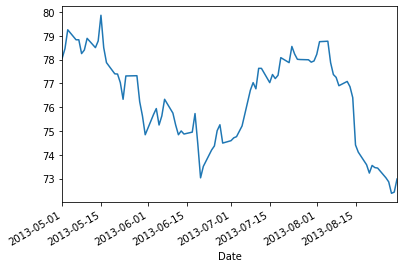

In [22]:
# 특정기간에 대한 시각화
df['Close'].loc['05-2013':'08-2013'].plot()

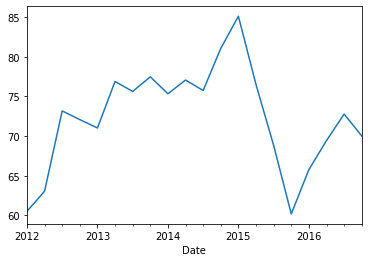

In [42]:
# 분기별 평균 종가를 선그래프로 표시
df['Close'].resample('Q').mean().plot()

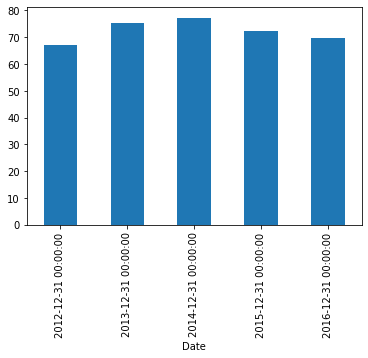

In [44]:
# 년도별 평균 종가를 막대그래프로 표시
df['Close'].resample('A').mean().plot(kind='bar')

# 이동평균 계산
* **이동평균** 이란 일정 기간의 값을 산술 평균한 값이다.
* 이 기간을 5일로 사용한 것이 5일 이동평균이고 이를 연결한 것이 5일 이동평균 선이라 한다.
* 이동평균선을 통해 해당 시계열 데이터의 추세를 확인할 수 있다.

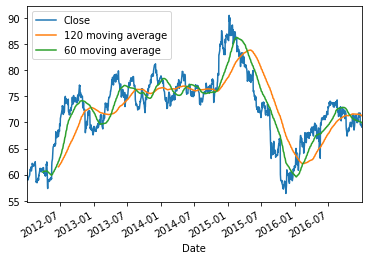

In [21]:
df['Close'].plot()
m_120=df['Close'].rolling(window=120).mean()
m_60 =df['Close'].rolling(window=60).mean()
m_120.plot(label='120 moving average')
m_60.plot(label='60 moving average')
plt.legend()